# **K-Fold Algorithm**

In [2]:
# importing libraries
from sklearn.cluster import KMeans #k-mean algorithm
from sklearn.preprocessing import MinMaxScaler #to scale the feature values for proper plotting
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/income.csv')

In [4]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


## **Initial Plot**

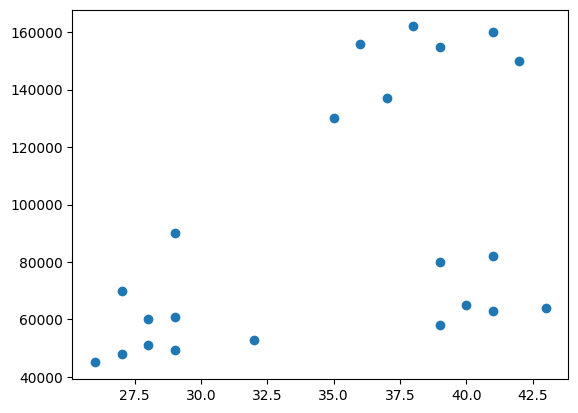

In [5]:
plt.scatter(df['Age'], df['Income($)'])

## **Applying K-Mean Clustering**

In [6]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [7]:
#fit() only learns from the data — it calculates the minimum and maximum values of the column (for MinMaxScaler).
#transform() actually applies the scaling formmula on the data to scale it.
y_pred=km.fit_predict(df[['Age','Income($)']])
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [8]:
# appending the output column in the dataset
df['Cluster']=y_pred
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [9]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]

## **Plotting the Clusters**

---

notice that the plotting is not accurate, its becuase the data points haven't been scaled yet


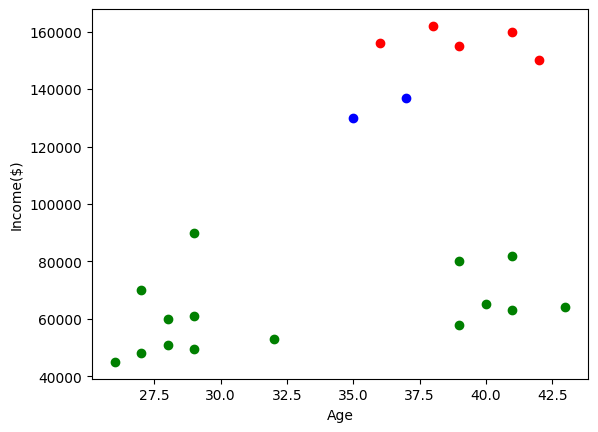

In [10]:
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='blue')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

## **Scaling the Data**

In [11]:
scaler=MinMaxScaler()
df['Income($)'] = scaler.fit_transform(df[['Income($)']])
df['Age'] = scaler.fit_transform(df[['Age']])
df

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,2


In [12]:
# applying k means again on the scaled data now
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df[['Age','Income($)']])
y_pred

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [13]:
df['Cluster']=y_pred
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [14]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]

In [15]:
# computing centroids
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

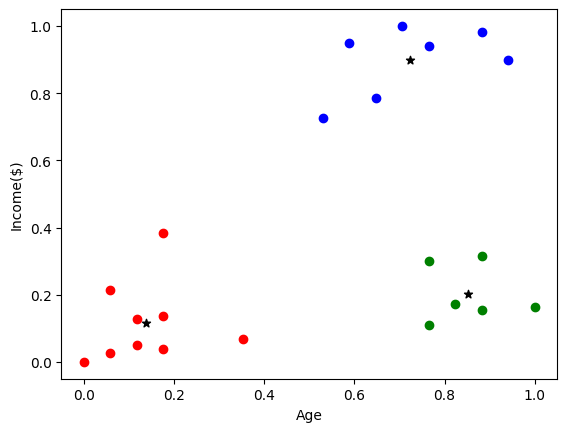

In [16]:
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='blue')

# km.cluster_centers_[:, 0] → all x-coordinates
# km.cluster_centers_[:, 1] → all y-coordinates
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='black', marker='*', label='Centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')

plt.show()

In [22]:
k_rng=range(1,10) #setting the range of k from 1 to 9
sse=[] #making array for sum of squared error
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit_predict(df[['Age','Income($)']]) #training with with cluster numbers
  sse.append(km.inertia_) #inertia_ is a built in function to compute sse

In [23]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3687734076440591,
 0.2963623258321303,
 0.32319896752881133,
 0.2223414948993869,
 0.15270536286861372,
 0.10824862283029266]

### **Plotting SSE with different K values (Elbow Method)**

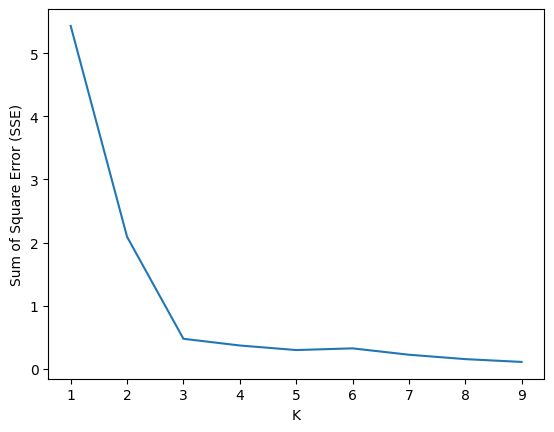

In [24]:
plt.xlabel('K')
plt.ylabel('Sum of Square Error (SSE)')
plt.plot(k_rng,sse)